# Statistica inferenziale

## Introduzione

La statistica inferenziale si occupa di trarre conclusioni generali su una **popolazione** a partire da un **campione**.

A differenza della statistica descrittiva, che lavora solo con i dati disponibili, la statistica inferenziale mira a fare affermazioni oltre il campione osservato, cercando di stimare caratteristiche della popolazione da cui è stato estratto.

Il campionamento **NON** segue un criterio deterministico. Questo significa che, ogni volta che si effettua un campionamento dalla popolazione, i dati che si ottengono possono cambiare.

In altre parole, **il campione è aleatorio**:

- Ogni elemento del campione è il risultato di un processo casuale.

- Quindi i valori del campione sono trattati come **variabili aleatorie**.

> Esempio: se scegli un campione casuale di 100 persone da una popolazione di studenti per stimarne l’altezza media, ripetendo l’esperimento potresti ottenere un campione diverso, con una media diversa.

Poiché il campione è soggetto al caso, si assume che i suoi valori siano realizzazioni di una variabile aleatoria.

> Si ipotizza che i valori numerici del campione seguano un modello probabilistico, cioè siano generati da una distribuzione di probabilità non nota, indicata di solito con $F$.

Questa distribuzione $F$ rappresenta il comportamento probabilistico della popolazione da cui si campiona.

> anche se non si conosce la forma precisa di $F$, si possono formulare ipotesi (es. distribuzione normale, esponenziale, ecc.) o stimare $F$ a partire dai dati del campione.

La statistica inferenziale permette di capire con quale distribuzione descrivere le osservazioni, attraverso duemetodologie:

- **Statistica inferenziale non parametrica**: La distribuzione $F$ è completamente sconosciuta

- **Statistica inferenziale parametrica**: Della distribuzione è conosciuta solamente la famiglia (uno dei modelli), mentre sono sconosciuti i parametri del modello. Indichiamo la distribuzione con $F(\theta)$ dove $\theta$ è il parametro sconosciuto di cui stimiamoil valore:

- **Stima puntuale**: forniamo un numero molto vicino a $\theta$

- **Stima per intervalli**: forniamo un intervallo di valori in cui ricade $\theta$

Ma quindi che cosa è uno stimatore?

Uno stimatore è una **funzione del campione**, cioè un calcolo basato sui dati osservati, che viene utilizzata per stimare un parametro ignoto della popolazione.

> **Definizione**: Uno stimatore è una **variabile aleatoria** costruita a partire dai dati del campione, il cui valore approssima a un parametro ignoto $\theta$

Attenzione: poichè il campione è aleatorio, **anche lo stimatore è aleatorio**: ogni nuovo campione fornirà un valore diverso.

Esempio: Supponiamo di voler stimare la media $\mu$ della popolazione. Un possibile stimatore è la media campionaria $\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$ MA quindi perchè in questo caso la media campionaria è uno stimatore di $\mu$?

1. Supponiamo di avere una popolazione enorme, e di prenderne solamente una parte, ad esempio `30` persone

2. A questo punto calcolo la media del campione, ovvero la media campionaria

3. La media campionaria $\bar{X}$ è uno stimatore di $\mu$, cioè è un numero calcolato dai dati che cerca di avvicinarsi al valore reale $\mu$ che non conosciamo.

Attenzione però:

- $\bar{X}$ è una variabile aleatoria: ogni volta che cambi campione, $\bar{X}$ cambia!

- Però, in media, $\bar{X}$ si avvicina a $\mu$: è uno stimatore corretto (non distorto).

Esempio semplice:

Immaginiamo che la vera media della popolazione sia `5`, ma di prendere solo 5 numeri a caso e trovare una media campionaria $\bar{X} =$ `4.8`. Poi rifacciamo il campionamento e troviamo $\bar{X} =$ `5.2`, poi `5.1`... e così via. Ogni $\bar{X}$ è uno stimatore di $\mu$.

Di seguito uno scrypt per visualizzare e "giocare" con il concetto di **stimatore**, nel caso della media campionaria come stimatore della media $\mu$

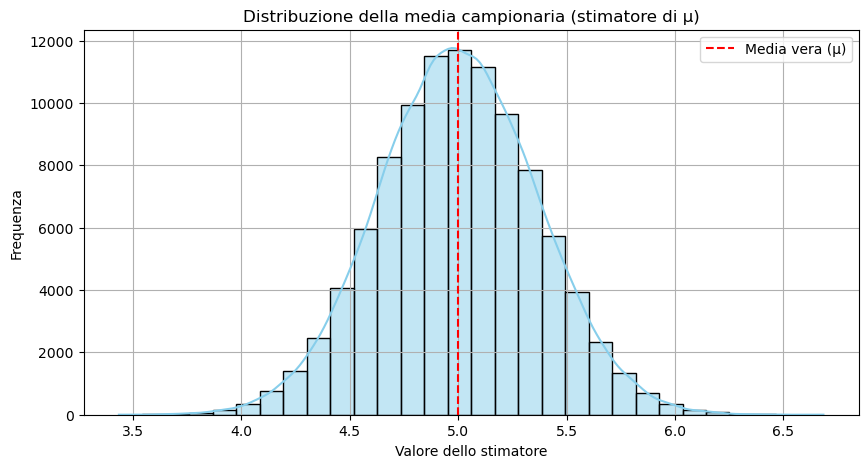

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parametri della popolazione
mu = 5      # media vera
sigma = 2   # deviazione standard vera

# Parametri della simulazione
n = 30       # dimensione del campione
N = 100000     # numero di campioni

# Lista per contenere le medie campionarie
medie_campionarie = []

for _ in range(N):
    campione = np.random.normal(mu, sigma, n)
    media_campione = np.mean(campione)
    medie_campionarie.append(media_campione)

# Plot: distribuzione dello stimatore (media campionaria)
plt.figure(figsize=(10, 5))
sns.histplot(medie_campionarie, kde=True, bins=30, color='skyblue', edgecolor='black')
plt.axvline(mu, color='red', linestyle='--', label='Media vera (μ)')
plt.title('Distribuzione della media campionaria (stimatore di μ)')
plt.xlabel('Valore dello stimatore')
plt.ylabel('Frequenza')
plt.legend()
plt.grid(True)
plt.show()


Cosa notiamo subito dal grafico?

Il grafico mostra la distribuzione delle **medie campionarie**: abbiamo estratto 1000 campioni da una popolazione normale con media 5 e calcolato la media di ciascun campione. Ecco cosa è possibile osservare:

- Le medie si ditribuiscono attorno alla vera media della popolazione.

- Anche se ogni campione è soggetto a variabilità, nel complesso le medie si concentrano vicino a $\mu$

- Questo illustra che la media campionaria è uno stimatore della media della popolazione: un valore calcolato da un campione che cerca di approssimare un parametro incognito della popolazione

All'aumentare della dimensione del campione, è possibile notare dal grafico come la distribuzione si avvicini  a $\mu$: altra caratteristica che ci suggerisce la correttezza del campione!

### Parametri e stimatori: distinzione fondamentale

Nel contesto della statistica inferenziale distinguiamo tra:

- **Parametro ($\theta$)**: è un valore **fisso** ma **ignoto** che descrive una caratteristica della popolazione, ad esempio:

  - la media $\mu$

  - la varianza $\sigma^2$

  - la proporzione $p$

- **Stimatore ($\hat{\theta}$)**: è una **funzione del campione** (cioè una variabile aleatoria) usata per **stimare** il parametro $\theta$. Esempi:

  - La media campionaria $\bar{X}$ è uno stimatore di $\mu$
  
  - La varianza campionaria $S^2$ è uno stimatore di $\sigma^2$

> ⚠️ Lo stimatore è **aleatorio**, perché dipende dal campione estratto. Il parametro invece è **fisso**, anche se sconosciuto.


### Stimatore non deviato

Uno stimatore è detto **non deviato** se la sua media è uguale al valore vero del parametro che si vuole stimare

Esempio:

La media campionaria 

$\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$ 

è uno **stimatore non deviato** della media della popolazione $\mu$ perchè: 

$E[\bar{X}] = \mu$

Un ottimo stimatore non deviato per stimare il valore atteso, indipendentemente dalla distribuzione, è quindi proprio la media campionaria.

##### Valutare la bontà di uno stimatore

Abbiamo visto che $\bar{X}$ è uno stimatore non deviato della media $\mu$, ovvero:

$E[\bar{X}] = \mu$

Ma tra due stimatori **non deviati**, quale conviene usare?

Per confrontare due stimatori non deviati si considera la **varianza** dello stimatore:

- La varianza misura quanto lo stimatore tende a oscillare da un campione all’altro.

- Minore è la varianza, più stabile e preciso è lo stimatore.

In conclusione, uno stimatore ottimale è quello non deviato con la varianza più bassa possibile.

Esistono due criteri fondamentali per valutare la bontà di uno stimatore:

1. **Bias (o deviazione)**: è la differenza tra il valore atteso dello stimatore e il  vero valore del parametro.

    $Bias(\hat{\theta}) = E[\hat{\theta}] - \theta$

    - Se il bias è nullo, lo stimatore è detto non deviato.

    - Misura quanto sistematicamente lo stimatore sovrastima o sottostima il parametro.

2. **Varianza**: misura quanto lo stimatore varia attorno al suo valore atteso:

    - Minore varianza -> maggiore **stabilità** dello stimatore

$Var(\hat{\theta}) = E[(\hat{\theta} - E[\hat{\theta}])^2]$

##### Scarto quadratico medio

Per riassumere in un'unica misura **sia il bias che la varianza**, si usa lo **scarto quadratico medio** (Mean Squared Error):

$MSE(\hat{\theta}) = E[(\hat{\theta} - \theta)^2] = Bias^2(\hat{\theta}) + Var(\hat{\theta})$

- Se uno stimatore è **non deviato**, allora: 

$MSE(\hat{\theta}) = Var(\hat{\theta})$

- In generale, minore è il MSE, migliore è lo stimatore, perchè tiene conto sia della deviazione sistematica che della variabilità

Per capire i concetti sopra trattati, di seguito uno script Python per giocare con bias, varianza e scarto quadratico medio di uno stimatore della media. Il codice:

- Simula una popolazione normale

- Estrae molti campioni

- Confronta due stimatori: la **media campionaria** (non deviata) e una **media "shiftata"** (uno stimatore artificiale deviato)

- Calcola Bias, varianza e MSE per entrambi

Media campionaria:
Bias: -0.0016, Varianza: 0.1315, MSE: 0.1315

Media shiftata (+0.5):
Bias: 0.4984, Varianza: 0.1315, MSE: 0.3799


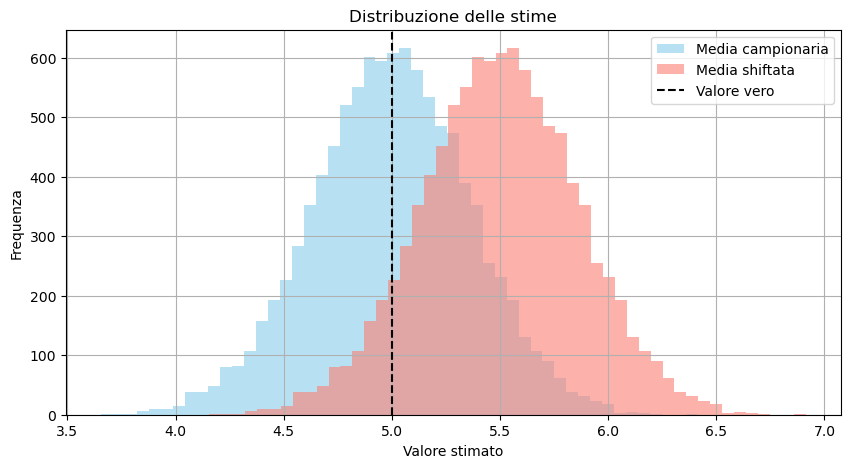

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri della popolazione
mu = 5       # media vera
sigma = 2    # deviazione standard
n = 30       # dimensione del campione
N = 10000    # numero di simulazioni

# Funzioni stimatori
def media_campionaria(sample):
    return np.mean(sample)

def media_shiftata(sample):
    return np.mean(sample) + 0.5  # stimatore volutamente deviato

# Simulazioni
media_stime = []
media_shiftate = []

for _ in range(N):
    sample = np.random.normal(mu, sigma, n)
    media_stime.append(media_campionaria(sample))
    media_shiftate.append(media_shiftata(sample))

media_stime = np.array(media_stime)
media_shiftate = np.array(media_shiftate)

# Calcolo Bias, Varianza, MSE
def analizza_stime(stime, vero_valore):
    bias = np.mean(stime) - vero_valore
    varianza = np.var(stime)
    mse = bias**2 + varianza
    return bias, varianza, mse

bias1, var1, mse1 = analizza_stime(media_stime, mu)
bias2, var2, mse2 = analizza_stime(media_shiftate, mu)

# Risultati
print("Media campionaria:")
print(f"Bias: {bias1:.4f}, Varianza: {var1:.4f}, MSE: {mse1:.4f}\n")

print("Media shiftata (+0.5):")
print(f"Bias: {bias2:.4f}, Varianza: {var2:.4f}, MSE: {mse2:.4f}")

# Istogramma
plt.figure(figsize=(10, 5))
plt.hist(media_stime, bins=50, alpha=0.6, label='Media campionaria', color='skyblue')
plt.hist(media_shiftate, bins=50, alpha=0.6, label='Media shiftata', color='salmon')
plt.axvline(mu, color='black', linestyle='--', label='Valore vero')
plt.title("Distribuzione delle stime")
plt.xlabel("Valore stimato")
plt.ylabel("Frequenza")
plt.legend()
plt.grid(True)
plt.show()


##### Consistenza in media quadratica

Uno stimatore $\hat{\theta}_n$ si dice **consistente in media quadratica** per il parametro $\theta$ se il suo **scarto quadratico medio** tende a zero al crescere della numerosità campionaria $n$:

$\lim_{n \to \infty}MSE(\hat{\theta}_n) = 0$

Poichè 

$MSE(\hat{\theta}_n) = Var(\hat{\theta}_n) + Bias^2(\hat{\theta}_n)$

Allora questa condizione implica che **sia la varianza che il bias** dello stimatore devono tendere a zero man mano che il campione cresce.

Intuizione: Uno stimatore è consistente se, quando aumentiamo la dimensione del campione, diventa sempre più preciso e si avvicina sempre di più al vero valore del parametro.

Nel caso della media campionaria $\bar{X}_n$, possiamo dimostrare che:

- È non deviata: $E[\bar{X}_n] = \mu$

- Ha varianza che tende a zero: $\text{Var}(\bar{X}_n) = \frac{\sigma^2}{n} \to 0$

Poiché il bias è nullo, il MSE coincide con la varianza, e quindi:

$MSE(\bar{X}_n) = Var(\bar{X}_n) = \frac{\sigma^2}{n} \to 0$

Conclusione: la media campionaria è consistente in media quadratica

Per capire meglio il concetto analizziamo il seguente grafico:

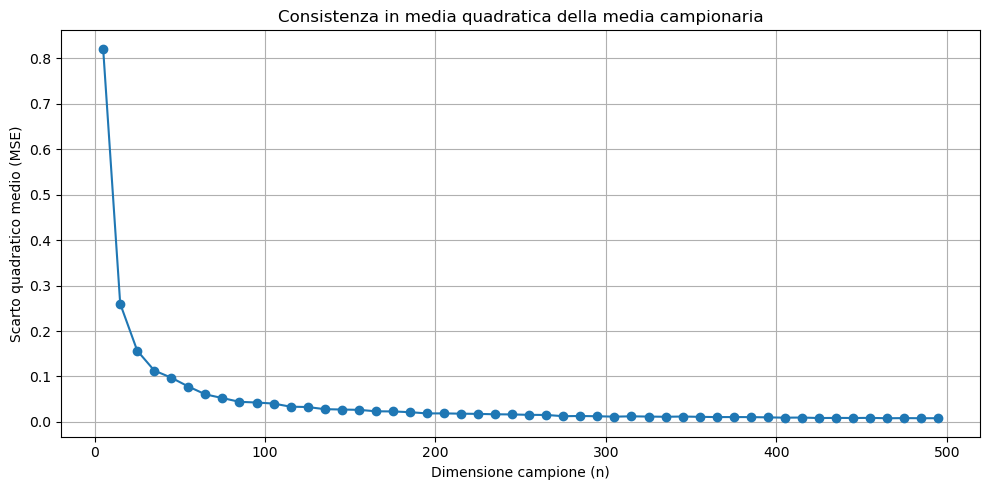

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri della popolazione
mu = 10
sigma = 2

# Range di dimensioni campionarie
sample_sizes = np.arange(5, 500, 10)

# Numero di simulazioni per ogni n
num_simulations = 1000

# Lista per memorizzare i valori di MSE
mse_values = []

for n in sample_sizes:
    sample_means = []
    for _ in range(num_simulations):
        sample = np.random.normal(loc=mu, scale=sigma, size=n)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    
    sample_means = np.array(sample_means)
    
    # Calcolo MSE: (media stimata - media vera)^2
    mse = np.mean((sample_means - mu)**2)
    mse_values.append(mse)

# Plot dei risultati
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, mse_values, marker='o')
plt.title('Consistenza in media quadratica della media campionaria')
plt.xlabel('Dimensione campione (n)')
plt.ylabel('Scarto quadratico medio (MSE)')
plt.grid(True)
plt.tight_layout()
plt.show()


Il grafico mostra come il valore dello scarto quadratico medio  dello stimatore diminunisce all'aumentare della dimensione del campione n.

Sull'asse:

- X: la dimensione del campione n

- Y: il valore del MSE dello stimatore della media

Quando il MSE diminuisce al crescere di n, sognifica che lo stimatore diventa più preciso e stabile man mano che usiamo più dati.

Questa convergenza del MSE verso 0 è proprio ciò che chiamiamo **consistenza in media quadratica**

##### Consistenza debole

Uno stimatore $\hat{\theta}_n$ di un parametro $\theta$ si dice consistente (debolmente) se:

$\forall \epsilon > 0$, $\lim_{n \to \infty}P(|\hat{\theta}_n - \theta| > \epsilon) = 0$

Cioè converge in probabilità al valore del parametro.

Significato pratico:

Man mano che aumentiamo la dimensione del campione:

- La probabilità che lo stimatore $\hat{\theta}_n$ si discosti troppo da $\theta$ tende a 0

- Lo stimatore si avvicina sempre di piu al parametro vero.

Nota: La consistenza in media quatratica  $\to$ implica la consistenza in probabilità, ma **non vale il contrario**

#### Legge dei grandi numeri

La legge dei grandi numeri, nota anche come **teorema di Bernoulli**, è un principio fondamentale della probabilità che descrive il comportamento della media di una sequenza di variabili casuali indipendenti e identicamente distribuite al crescere del numero di osservazioni

La legge afferma che, al crescere del numero di osservazioni n, la media campionaria tende a convergere al valore atteso $\mu$ della distribuzione da cui sono tratte le osservazioni.

Esistono due versioni principali:

- **Legge Debole Dei Grandi Numeri**: la media campionaria converge **in probabilità** al valore atteso:

$\forall \epsilon > 0$, $\lim_{n \to \infty}P(|\bar{X}_n - \mu| > \epsilon) = 0$

- **Legge Forte Dei Grandi Numeri**: la media campionaria converge **quasi certamente** al valore atteso:

$P(\lim_{n \to \infty}\bar{X}_n = \mu) = 1$

La legge dei grandi numeri garantisce che, con un numero sufficientemente grande di osservazioni, la media campionaria sarà arbitrariamente vicina al valore atteso della distribuzione.

Analizziamo un esempio pratico per comprendere meglio:

Consideriamo il lancio ripetuto di una moneta equa (p = 0.5).

Se lanciamo la moneta un numero crescente di volte e calcoliamo la frequenza relativa di teste, osserveremo che questa frequenza si avvicina più a 0.5

Ad esempio:

- **10 lanci**: 6 teste $\to$ frequenza = `0.60`

- **100 lanci**: 56 teste $\to$ frequenza = `0.56`

- **100 lanci**: 532 teste $\to$ frequenza = `0.532`

Possiamo osservare come all'aumentare del numero di lanci, la frequenza relativa delle teste tende alla probabilità teorica di `0.5`

#### Taglia minima di un campione

La taglia minima del campione indica quante osservazioni sono necessarie per ottenere stime affidabili dei parametri della popolazione

Quando raccogliamo dati, non possiamo osservare tutta la popolazione, quindi:

- Un campione troppo piccolo, potrebbe dare stime poco affidabili

- Un campione troppo grande potrebbe essere inutile e costoso

Per questo si vuole determinare una taglia ottimale che garantisca:

- Una precisione accettabile

- Un livello di confidenza desiderato

- Un margine d'errore